$$\ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ 20165549\ \ JANG\ \ JAE\ \ YONG$$

**Apply K-means algorithm to the regular grid of a spatial domain in two dimension with varying number of clusters.**

In [10]:
import matplotlib.pyplot as plt
import numpy as np

size_vertical  	= 100                # size of vertical 
size_horizontal	= 100                # size of horizontal

n = size_vertical*size_horizontal    # number of point

#
# L1 - Norm
#
def L1_Norm(x, y):

    d = abs(x - y)
    s = np.sum(d)
    
    return(s)

#
# L2 - Norm
#
def L2_Norm(x, y):

    d = (x - y) ** 2
    s = np.sum(d)
    r = np.sqrt(s)

    return(r)


* The spatial domain can be represented by two matrices where one matrix represents the horizontal index and the other matrix represents the vertical index.

In [11]:
vertical_index   = np.empty(size_vertical, dtype=float)
horizontal_index = np.empty(size_horizontal, dtype=float)

for i in range(size_vertical):
    vertical_index[i] = i

for j in range(size_horizontal):
    horizontal_index[i] = j

point_idx = np.empty((size_vertical,size_horizontal,2), dtype=float)

for i in range(size_vertical):
    for j in range(size_horizontal):
        point_idx[i, j, 0] = horizontal_index[j]
        point_idx[i, j, 1] = vertical_index[i]

* Define a distance between each spatial point $(x_i, y_i)$ and a centroid $(c_x^k, c_y^k)$ for cluster k using L1-norm.

In [12]:
def K_Means_Algo_L1(k):
    
    # Get random label
    rand_label = np.random.randint(0, k, n)
    list_label = np.empty((size_vertical, size_horizontal), dtype=int)
    
    for i in range(size_vertical):
        for j in range(size_horizontal):
            list_label[i, j] = rand_label[(i+1)*j]
    
    # make a matrix of centroid
    # (x & y , K) 
    centroid = np.zeros((2, k), dtype=float) 
    # make a matrix of iteration
    iteration = np.zeros((2, k), dtype=float)
    count = np.zeros((2, k), dtype=float)
 
    #
    # Initial label
    #
    for i in range(size_vertical):
        for j in range(size_horizontal):
            centroid[:, list_label[i, j]] += point_idx[i, j, :]          
            count[: ,list_label[i, j]] += 1
    
    centroid /= count
    count *= 0
    
    list_distance = np.empty(k, dtype=float)
    dist_sum = np.zeros(k, dtype=float)
    energy_list = np.zeros(11 , dtype=float)
        
    #
    # Iterating 6 times.
    #
    for iterate in range(6):
        
        #
        # Plot Centroid
        #
        print('')
        print(iterate+1, ' Iteration')
        print('')
        plt.scatter(centroid[0, 0], centroid[1, 0], c = 'g', s=8)
        plt.scatter(centroid[0, 1], centroid[1, 1], c = 'r', s=8)
        plt.scatter(centroid[0, 2], centroid[1, 2], c = 'b', s=8)
        plt.scatter(centroid[0, 3], centroid[1, 3], c = 'y', s=8)
        plt.scatter(centroid[0, 4], centroid[1, 4], c = 'k', s=8)
        plt.xlim(0, 100)
        plt.ylim(0, 100)
        plt.show()
        
        for i in range(size_vertical):
            for j in range(size_horizontal):
                x = point_idx[i, j, :]
                for t in range(k):
                    y = centroid[:, t]
                    list_distance[t] = L1_Norm(x, y)

                min_value = min(list_distance)
                distance_index = np.where(list_distance == min_value)
                iteration[:, int(distance_index[0])] += x
                count[:, int(distance_index[0])] += 1            
                dist_sum[int(distance_index[0])] += min_value
                list_label[i, j] = int(distance_index[0])

        #
        # compute Centroid
        #
        centroid = iteration.copy()
        centroid = centroid / count
        
        #
        # compute Energy
        #
        energy_sum = dist_sum.sum()
        energy_sum /= n
        energy_list[iterate] = energy_sum
        
        #
        # initialize
        #
        dist_sum *= 0
        energy_sum = 0
        
        iteration *= 0
        count *= 0
        
        #
        # Plot result
        #
        for j in range(size_horizontal):
            for i in range(size_vertical):
                if list_label[i,j] == 0:
                    plt.scatter(point_idx[i, j, 0], point_idx[i, j, 1], c = 'g', s=5)
                if list_label[i,j] == 1:
                    plt.scatter(point_idx[i, j, 0], point_idx[i, j, 1], c = 'r', s=5)
                if list_label[i,j] == 2:
                    plt.scatter(point_idx[i, j, 0], point_idx[i, j, 1], c = 'b', s=5)
                if list_label[i,j] == 3:
                    plt.scatter(point_idx[i, j, 0], point_idx[i, j, 1], c = 'y', s=5)
                if list_label[i,j] == 4:
                    plt.scatter(point_idx[i, j, 0], point_idx[i, j, 1], c = 'k', s=5)

        plt.show()
    
    
    return np.array(energy_list)
    # Return Energy

* Define a distance between each spatial point $(x_i, y_i)$ and a centroid $(c_x^k, c_y^k)$ for cluster k using L2-norm.

In [13]:
def K_Means_Algo_L2(k):
    
    # Get random label
    rand_label = np.random.randint(0, k, n)
    list_label = np.empty((size_vertical, size_horizontal), dtype=int)
    
    for i in range(size_vertical):
        for j in range(size_horizontal):
            list_label[i, j] = rand_label[(i+1)*j]
    
    # make a matrix of centroid
    # (x & y , K) 
    centroid = np.zeros((2, k), dtype=float) 
    # make a matrix of iteration
    iteration = np.zeros((2, k), dtype=float)
    count = np.zeros((2, k), dtype=float)
 
    #
    # Initial label
    #
    for i in range(size_vertical):
        for j in range(size_horizontal):
            centroid[:, list_label[i, j]] += point_idx[i, j, :]          
            count[: ,list_label[i, j]] += 1
    
    centroid /= count
    count *= 0
    
    list_distance = np.empty(k, dtype=float)
    dist_sum = np.zeros(k, dtype=float)
    energy_list = np.zeros(11 , dtype=float)
        
    #
    # Iterating 6 times.
    #
    for iterate in range(6):
        
        #
        # Plot Centroid
        #
        print('')
        print(iterate+1, ' Iteration')
        print('')
        plt.scatter(centroid[0, 0], centroid[1, 0], c = 'g', s=8)
        plt.scatter(centroid[0, 1], centroid[1, 1], c = 'r', s=8)
        plt.scatter(centroid[0, 2], centroid[1, 2], c = 'b', s=8)
        plt.scatter(centroid[0, 3], centroid[1, 3], c = 'y', s=8)
        plt.scatter(centroid[0, 4], centroid[1, 4], c = 'k', s=8)
        plt.xlim(0, 100)
        plt.ylim(0, 100)
        plt.show()
        
        for i in range(size_vertical):
            for j in range(size_horizontal):
                x = point_idx[i, j, :]
                for t in range(k):
                    y = centroid[:, t]
                    list_distance[t] = L2_Norm(x, y)

                min_value = min(list_distance)
                distance_index = np.where(list_distance == min_value)
                iteration[:, int(distance_index[0])] += x
                count[:, int(distance_index[0])] += 1            
                dist_sum[int(distance_index[0])] += min_value
                list_label[i, j] = int(distance_index[0])

        #
        # compute Centroid
        #
        centroid = iteration.copy()
        centroid = centroid / count
        
        #
        # compute Energy
        #
        energy_sum = dist_sum.sum()
        energy_sum /= n
        energy_list[iterate] = energy_sum
        
        #
        # initialize
        #
        dist_sum *= 0
        energy_sum = 0
        
        iteration *= 0
        count *= 0
        
        #
        # Plot result
        #
        for j in range(size_horizontal):
            for i in range(size_vertical):
                if list_label[i,j] == 0:
                    plt.scatter(point_idx[i, j, 0], point_idx[i, j, 1], c = 'g', s=5)
                if list_label[i,j] == 1:
                    plt.scatter(point_idx[i, j, 0], point_idx[i, j, 1], c = 'r', s=5)
                if list_label[i,j] == 2:
                    plt.scatter(point_idx[i, j, 0], point_idx[i, j, 1], c = 'b', s=5)
                if list_label[i,j] == 3:
                    plt.scatter(point_idx[i, j, 0], point_idx[i, j, 1], c = 'y', s=5)
                if list_label[i,j] == 4:
                    plt.scatter(point_idx[i, j, 0], point_idx[i, j, 1], c = 'k', s=5)

        plt.show()
    
    
    return np.array(energy_list)
    # Return Energy

**Visualize the result using color coding scheme that distinguishes different clusters.**

**Observe the trajectory of centroid during the optimization and the shape of the clusters depending on the distance.**

# . (L1-Norm) Results of running the K-means with $K = 5$


1  Iteration



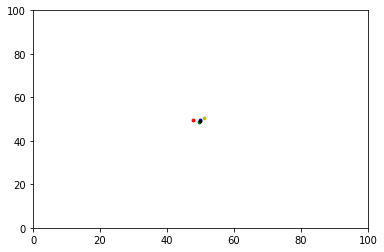

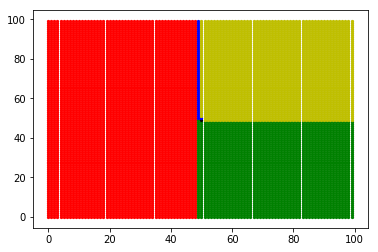


2  Iteration



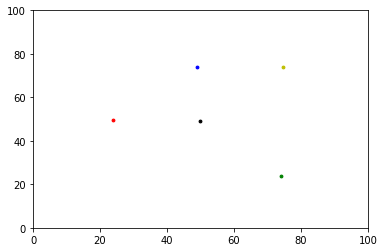

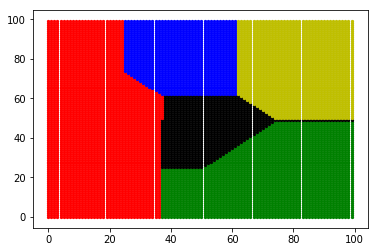


3  Iteration



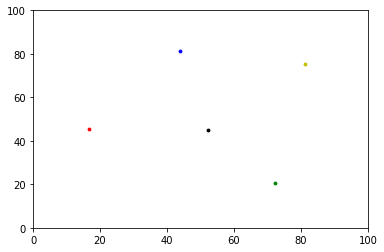

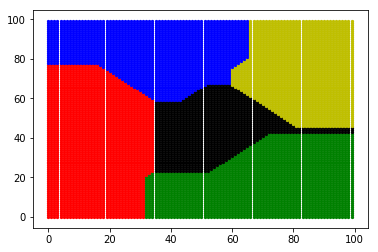


4  Iteration



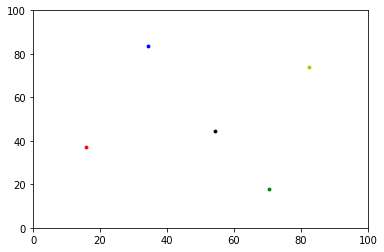

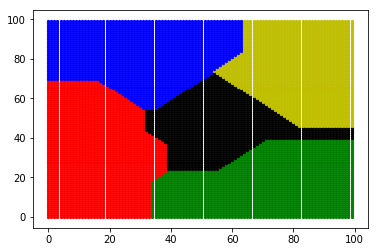


5  Iteration



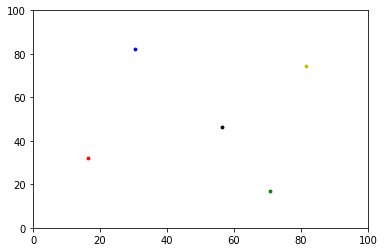

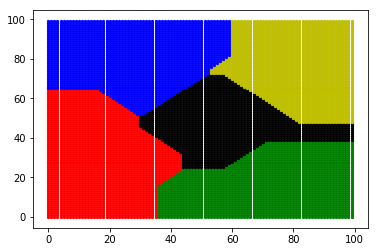


6  Iteration



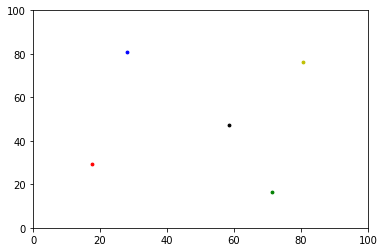

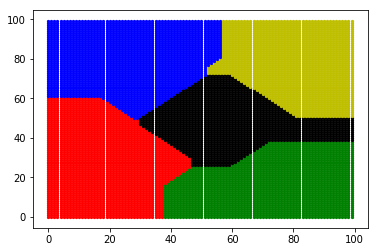

In [14]:
k = 5
E= K_Means_Algo_L1(k)

# . (L2-Norm) Results of running the K-means with $K = 5$


1  Iteration



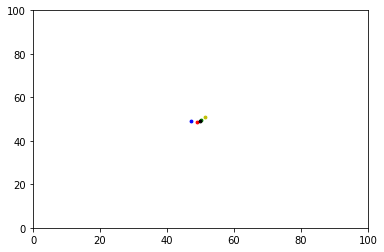

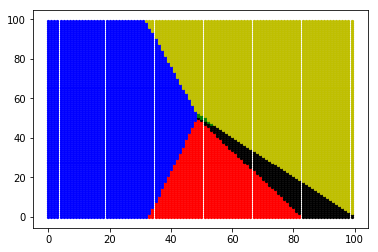


2  Iteration



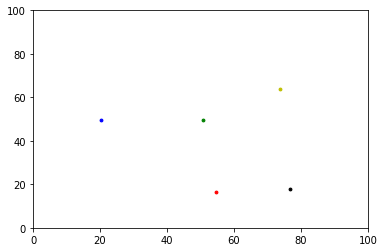

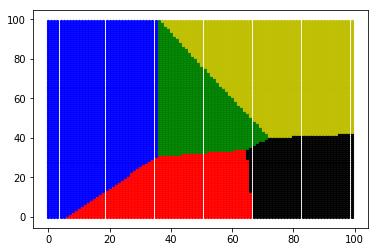


3  Iteration



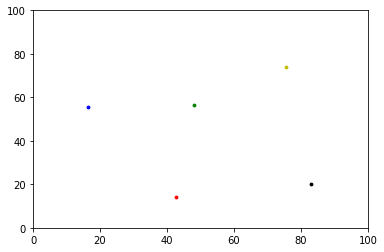

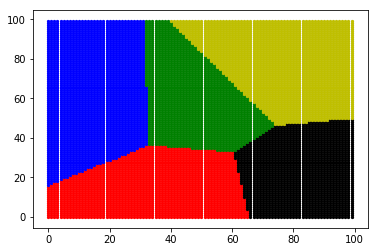


4  Iteration



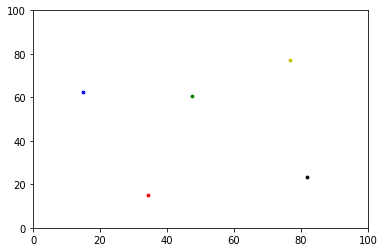

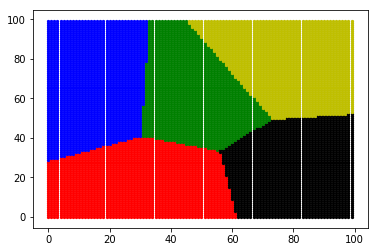


5  Iteration



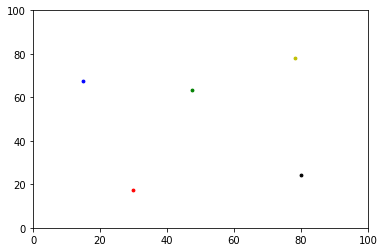

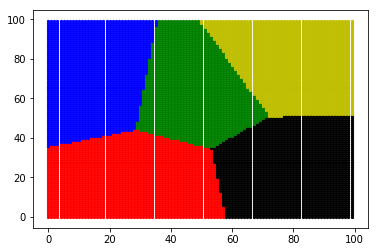


6  Iteration



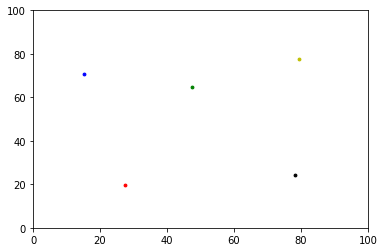

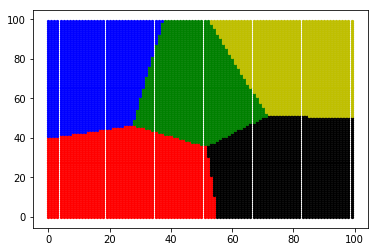

In [30]:
k = 5
E= K_Means_Algo_L2(k)